<a href="https://colab.research.google.com/github/jsh1021902/ai_for_machine_learning/blob/main/week4/4_reshaping_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reshaping Data

## About the data
In this notebook, we will using daily temperature data from the [National Centers for Environmental Information (NCEI) API](https://www.ncdc.noaa.gov/cdo-web/webservices/v2). We will use the Global Historical Climatology Network - Daily (GHCND) dataset; see the documentation [here](https://www1.ncdc.noaa.gov/pub/data/cdo/documentation/GHCND_documentation.pdf).

This data was collected for New York City for October 2018, using the Boonton 1 station (GHCND:USC00280907). It contains:
- the daily minimum temperature (`TMIN`)
- the daily maximum temperature (`TMAX`)
- the daily temperature at time of observation (`TOBS`)

*Note: The NCEI is part of the National Oceanic and Atmospheric Administration (NOAA) and, as you can see from the URL for the API, this resource was created when the NCEI was called the NCDC. Should the URL for this resource change in the future, you can search for "NCEI weather API" to find the updated one.*

## Setup
We need to import `pandas` and read in the long format data to get started:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/Hands-On-Data-Analysis-with-Pandas-2nd-edition/ch_03/

/content/drive/MyDrive/Hands-On-Data-Analysis-with-Pandas-2nd-edition/ch_03


In [ ]:
ls

1-wide_vs_long.ipynb           cross-chap03-task02.ipynb  data/
2-using_the_weather_api.ipynb  cross_chap3_task1.md       exercises/
3-cleaning_data.ipynb          cross_chap3_task1.pdf      faang.csv
4-reshaping_data.ipynb         cross_chap3_task2.md       README.md
5-handling_data_issues.ipynb   cross_chap3_task2.pdf


In [ ]:
import os
os.listdir('data')

['README.md',
 'bitcoin.csv',
 'dirty_data.csv',
 'long_data.csv',
 'nyc_temperatures.csv',
 'sp500.csv',
 'wide_data.csv']

In [ ]:
import pandas as pd

long_df = pd.read_csv(
    'data/long_data.csv', usecols=['date', 'datatype', 'value']
).rename(
    columns={'value': 'temp_C'}
).assign(
    date=lambda x: pd.to_datetime(x.date),
    temp_F=lambda x: (x.temp_C * 9/5) + 32
)
long_df.head()

,datatype,date,temp_C,temp_F
0,TMAX,2018-10-01,21.1,69.98
1,TMIN,2018-10-01,8.9,48.02
2,TOBS,2018-10-01,13.9,57.02
3,TMAX,2018-10-02,23.9,75.02
4,TMIN,2018-10-02,13.9,57.02


In [ ]:
long_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   datatype  93 non-null     object        
 1   date      93 non-null     datetime64[ns]
 2   temp_C    93 non-null     float64       
 3   temp_F    93 non-null     float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 3.0+ KB


## Transposing
Transposing swaps the rows and the columns. We use the `T` attribute to do so:

In [ ]:
long_df.set_index('date').head(6).T

date,2018-10-01,2018-10-01,2018-10-01,2018-10-02,2018-10-02,2018-10-02
datatype,TMAX,TMIN,TOBS,TMAX,TMIN,TOBS
temp_C,21.1,8.9,13.9,23.9,13.9,17.2
temp_F,69.98,48.02,57.02,75.02,57.02,62.96


## Pivoting
Going from long to wide format.

### `pivot()`
We can restructure our data by picking a column to go in the index (`index`), a column whose unique values will become column names (`columns`), and the values to place in those columns (`values`). The `pivot()` method can be used when we don't need to perform any aggregation in addition to our restructuring (when our index is unique); if this is not the case, we need the `pivot_table()` method which we will cover in chapter 4.

In [ ]:
long_df.head()

,datatype,date,temp_C,temp_F
0,TMAX,2018-10-01,21.1,69.98
1,TMIN,2018-10-01,8.9,48.02
2,TOBS,2018-10-01,13.9,57.02
3,TMAX,2018-10-02,23.9,75.02
4,TMIN,2018-10-02,13.9,57.02


In [ ]:
pivoted_df = long_df.pivot(
    index='date', columns='datatype', values='temp_C'
)
pivoted_df.head()

datatype,TMAX,TMIN,TOBS
date,,,
2018-10-01,21.1,8.9,13.9
2018-10-02,23.9,13.9,17.2
2018-10-03,25.0,15.6,16.1
2018-10-04,22.8,11.7,11.7
2018-10-05,23.3,11.7,18.9


Now that the data is pivoted, we have wide format data that we can grab summary statistics with:

In [ ]:
pivoted_df.describe()

datatype,TMAX,TMIN,TOBS
count,31.000000,31.000000,31.000000
mean,16.829032,7.561290,10.022581
std,5.714962,6.513252,6.596550
min,7.800000,-1.100000,-1.100000
25%,12.750000,2.500000,5.550000
50%,16.100000,6.700000,8.300000
75%,21.950000,13.600000,16.100000
max,26.700000,17.800000,21.700000


We can also provide multiple values to pivot on, which will result in a hierarchical index:

In [ ]:
pivoted_df = long_df.pivot(
    index='date', columns='datatype', values=['temp_C', 'temp_F']
)
pivoted_df.head()

temp_C             temp_F              
datatype     TMAX  TMIN  TOBS   TMAX   TMIN   TOBS
date                                              
2018-10-01   21.1   8.9  13.9  69.98  48.02  57.02
2018-10-02   23.9  13.9  17.2  75.02  57.02  62.96
2018-10-03   25.0  15.6  16.1  77.00  60.08  60.98
2018-10-04   22.8  11.7  11.7  73.04  53.06  53.06
2018-10-05   23.3  11.7  18.9  73.94  53.06  66.02

With the hierarchical index, if we want to select `TMIN` in Fahrenheit, we will first need to select `temp_F` and then `TMIN`:

In [ ]:
pivoted_df.index

DatetimeIndex(['2018-10-01', '2018-10-02', '2018-10-03', '2018-10-04',
               '2018-10-05', '2018-10-06', '2018-10-07', '2018-10-08',
               '2018-10-09', '2018-10-10', '2018-10-11', '2018-10-12',
               '2018-10-13', '2018-10-14', '2018-10-15', '2018-10-16',
               '2018-10-17', '2018-10-18', '2018-10-19', '2018-10-20',
               '2018-10-21', '2018-10-22', '2018-10-23', '2018-10-24',
               '2018-10-25', '2018-10-26', '2018-10-27', '2018-10-28',
               '2018-10-29', '2018-10-30', '2018-10-31'],
              dtype='datetime64[ns]', name='date', freq=None)

In [ ]:
pivoted_df.columns

MultiIndex([('temp_C', 'TMAX'),
            ('temp_C', 'TMIN'),
            ('temp_C', 'TOBS'),
            ('temp_F', 'TMAX'),
            ('temp_F', 'TMIN'),
            ('temp_F', 'TOBS')],
           names=[None, 'datatype'])

In [ ]:
pivoted_df['temp_F'].head()

datatype,TMAX,TMIN,TOBS
date,,,
2018-10-01,69.98,48.02,57.02
2018-10-02,75.02,57.02,62.96
2018-10-03,77.00,60.08,60.98
2018-10-04,73.04,53.06,53.06
2018-10-05,73.94,53.06,66.02


In [ ]:
pivoted_df['temp_F']['TMIN'].head()

date
2018-10-01    48.02
2018-10-02    57.02
2018-10-03    60.08
2018-10-04    53.06
2018-10-05    53.06
Name: TMIN, dtype: float64

### `unstack()`

We have been working with a single index throughout this chapter; however, we can create an index from any number of columns with `set_index()`. This gives us an index of type `MultiIndex`, where the outermost level corresponds to the first element in the list provided to `set_index()`:

In [ ]:
long_df.head()

,datatype,date,temp_C,temp_F
0,TMAX,2018-10-01,21.1,69.98
1,TMIN,2018-10-01,8.9,48.02
2,TOBS,2018-10-01,13.9,57.02
3,TMAX,2018-10-02,23.9,75.02
4,TMIN,2018-10-02,13.9,57.02


In [ ]:
multi_index_df = long_df.set_index(['date', 'datatype'])
multi_index_df.head().index

MultiIndex([('2018-10-01', 'TMAX'),
            ('2018-10-01', 'TMIN'),
            ('2018-10-01', 'TOBS'),
            ('2018-10-02', 'TMAX'),
            ('2018-10-02', 'TMIN')],
           names=['date', 'datatype'])

In [ ]:
multi_index_df.head()

temp_C  temp_F
date       datatype                
2018-10-01 TMAX        21.1   69.98
           TMIN         8.9   48.02
           TOBS        13.9   57.02
2018-10-02 TMAX        23.9   75.02
           TMIN        13.9   57.02

In [ ]:
multi_index_df.reset_index()

,date,datatype,temp_C,temp_F
0,2018-10-01,TMAX,21.1,69.98
1,2018-10-01,TMIN,8.9,48.02
2,2018-10-01,TOBS,13.9,57.02
3,2018-10-02,TMAX,23.9,75.02
4,2018-10-02,TMIN,13.9,57.02
...,...,...,...,...
88,2018-10-30,TMIN,2.2,35.96
89,2018-10-30,TOBS,5.0,41.00
90,2018-10-31,TMAX,12.2,53.96
91,2018-10-31,TMIN,0.0,32.00


Notice there are now 2 index sections of the dataframe:

In [ ]:
multi_index_df.head()

temp_C  temp_F
date       datatype                
2018-10-01 TMAX        21.1   69.98
           TMIN         8.9   48.02
           TOBS        13.9   57.02
2018-10-02 TMAX        23.9   75.02
           TMIN        13.9   57.02

With an index of type `MultiIndex`, we can no longer use `pivot()`. We must now use `unstack()`, which by default moves the innermost index onto the columns:

In [ ]:
unstacked_df = multi_index_df.unstack()
unstacked_df.head()

temp_C             temp_F              
datatype     TMAX  TMIN  TOBS   TMAX   TMIN   TOBS
date                                              
2018-10-01   21.1   8.9  13.9  69.98  48.02  57.02
2018-10-02   23.9  13.9  17.2  75.02  57.02  62.96
2018-10-03   25.0  15.6  16.1  77.00  60.08  60.98
2018-10-04   22.8  11.7  11.7  73.04  53.06  53.06
2018-10-05   23.3  11.7  18.9  73.94  53.06  66.02

The `unstack()` method also provides the `fill_value` parameter, which let's us fill-in any `NaN` values that might arise from this restructuring of the data. Consider the case that we have data for the average temperature on October 1, 2018, but no other date:

In [ ]:
extra_data = long_df.append([{
    'datatype': 'TAVG',
    'date': '2018-10-01',
    'temp_C': 10,
    'temp_F': 50
}]).set_index(['date', 'datatype'])

extra_data

<ipython-input-25-f636b9e0608e>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  extra_data = long_df.append([{
<ipython-input-25-f636b9e0608e>:6: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  }]).set_index(['date', 'datatype'])


temp_C  temp_F
date       datatype                
2018-10-01 TMAX        21.1   69.98
           TMIN         8.9   48.02
           TOBS        13.9   57.02
2018-10-02 TMAX        23.9   75.02
           TMIN        13.9   57.02
...                     ...     ...
2018-10-30 TOBS         5.0   41.00
2018-10-31 TMAX        12.2   53.96
           TMIN         0.0   32.00
           TOBS         0.0   32.00
2018-10-01 TAVG        10.0   50.00

[94 rows x 2 columns]

In [ ]:
extra_data = long_df.append([{
    'datatype': 'TAVG',
    'date': '2018-10-01',
    'temp_C': 10,
    'temp_F': 50
}]).set_index(['date', 'datatype']).sort_index()

extra_data

<ipython-input-26-ffa676ea112e>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  extra_data = long_df.append([{
<ipython-input-26-ffa676ea112e>:6: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  }]).set_index(['date', 'datatype']).sort_index()


temp_C  temp_F
date       datatype                
2018-10-01 TAVG        10.0   50.00
           TMAX        21.1   69.98
           TMIN         8.9   48.02
           TOBS        13.9   57.02
2018-10-02 TMAX        23.9   75.02
...                     ...     ...
2018-10-30 TMIN         2.2   35.96
           TOBS         5.0   41.00
2018-10-31 TMAX        12.2   53.96
           TMIN         0.0   32.00
           TOBS         0.0   32.00

[94 rows x 2 columns]

In [ ]:
extra_data = long_df.append([{
    'datatype': 'TAVG',
    'date': '2018-10-01',
    'temp_C': 10,
    'temp_F': 50
}]).set_index(['date', 'datatype']).sort_index()

extra_data['2018-10-01':'2018-10-02']

<ipython-input-27-515a4e4ec9fd>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  extra_data = long_df.append([{
<ipython-input-27-515a4e4ec9fd>:6: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  }]).set_index(['date', 'datatype']).sort_index()


temp_C  temp_F
date       datatype                
2018-10-01 TAVG        10.0   50.00
           TMAX        21.1   69.98
           TMIN         8.9   48.02
           TOBS        13.9   57.02
2018-10-02 TMAX        23.9   75.02
           TMIN        13.9   57.02
           TOBS        17.2   62.96

If we use `unstack()` in this case, we will have `NaN` for the `TAVG` columns every day but October 1, 2018:

In [ ]:
extra_data.unstack().head()

temp_C                   temp_F                     
datatype     TAVG  TMAX  TMIN  TOBS   TAVG   TMAX   TMIN   TOBS
date                                                           
2018-10-01   10.0  21.1   8.9  13.9   50.0  69.98  48.02  57.02
2018-10-02    NaN  23.9  13.9  17.2    NaN  75.02  57.02  62.96
2018-10-03    NaN  25.0  15.6  16.1    NaN  77.00  60.08  60.98
2018-10-04    NaN  22.8  11.7  11.7    NaN  73.04  53.06  53.06
2018-10-05    NaN  23.3  11.7  18.9    NaN  73.94  53.06  66.02

To address this, we can pass in an appropriate `fill_value`. However, we are restricted to passing in a value for this, not a strategy (like we saw with `fillna()`), so while `-40` is definitely not be the best value, we can use it to illustrate how this works, since this is the temperature at which Fahrenheit and Celsius are equal:

In [ ]:
extra_data.unstack(fill_value=-40).head()

temp_C                   temp_F                     
datatype     TAVG  TMAX  TMIN  TOBS   TAVG   TMAX   TMIN   TOBS
date                                                           
2018-10-01   10.0  21.1   8.9  13.9   50.0  69.98  48.02  57.02
2018-10-02  -40.0  23.9  13.9  17.2  -40.0  75.02  57.02  62.96
2018-10-03  -40.0  25.0  15.6  16.1  -40.0  77.00  60.08  60.98
2018-10-04  -40.0  22.8  11.7  11.7  -40.0  73.04  53.06  53.06
2018-10-05  -40.0  23.3  11.7  18.9  -40.0  73.94  53.06  66.02

## Melting
Going from wide to long format.

### Setup

In [ ]:
wide_df = pd.read_csv('data/wide_data.csv')
wide_df.head()

,date,TMAX,TMIN,TOBS
0,2018-10-01,21.1,8.9,13.9
1,2018-10-02,23.9,13.9,17.2
2,2018-10-03,25.0,15.6,16.1
3,2018-10-04,22.8,11.7,11.7
4,2018-10-05,23.3,11.7,18.9


### `melt()`
In order to go from wide format to long format, we use the `melt()` method. We have to specify:
- `id_vars`: which column(s) uniquely identify a row in the wide format (`date`, here)
- `value_vars`: the column(s) that contain(s) the values (`TMAX`, `TMIN`, and `TOBS`, here)

Optionally, we can also provide:
- `value_name`: what to call the column that will contain all the values once melted
- `var_name`: what to call the column that will contain the names of the variables being measured

In [ ]:
melted_df = wide_df.melt(
    id_vars='date',
    value_vars=['TMAX', 'TMIN', 'TOBS'],
    value_name='temp_C',
    var_name='measurement'
)
melted_df.head()

,date,measurement,temp_C
0,2018-10-01,TMAX,21.1
1,2018-10-02,TMAX,23.9
2,2018-10-03,TMAX,25.0
3,2018-10-04,TMAX,22.8
4,2018-10-05,TMAX,23.3


In [ ]:
melted_df.sort_values(by='date').head()

,date,measurement,temp_C
0,2018-10-01,TMAX,21.1
62,2018-10-01,TOBS,13.9
31,2018-10-01,TMIN,8.9
1,2018-10-02,TMAX,23.9
63,2018-10-02,TOBS,17.2


### `stack()`
Another option is `stack()`, which will pivot the columns of the dataframe into the innermost level of the index (resulting in an index of type `MultiIndex`). To illustrate this, let's set our index to be the `date` column:

In [ ]:
wide_df.set_index('date', inplace=True)
wide_df.head()

,TMAX,TMIN,TOBS
date,,,
2018-10-01,21.1,8.9,13.9
2018-10-02,23.9,13.9,17.2
2018-10-03,25.0,15.6,16.1
2018-10-04,22.8,11.7,11.7
2018-10-05,23.3,11.7,18.9


By running `stack()` now, we will create a second level in our index which will contain the column names of our dataframe (`TMAX`, `TMIN`, `TOBS`). This will leave us with a `Series` object containing the values:

In [ ]:
stacked_series = wide_df.stack()
stacked_series.head()

date            
2018-10-01  TMAX    21.1
            TMIN     8.9
            TOBS    13.9
2018-10-02  TMAX    23.9
            TMIN    13.9
dtype: float64

We can use the `to_frame()` method on our `Series` object to turn it into a `DataFrame` object. Since the series doesn't have a name at the moment, we will pass in the name as an argument:

In [ ]:
stacked_df = stacked_series.to_frame('values')
stacked_df.head()

values
date                   
2018-10-01 TMAX    21.1
           TMIN     8.9
           TOBS    13.9
2018-10-02 TMAX    23.9
           TMIN    13.9

Once again, we have an index of type `MultiIndex`:

In [ ]:
stacked_df.head().index

MultiIndex([('2018-10-01', 'TMAX'),
            ('2018-10-01', 'TMIN'),
            ('2018-10-01', 'TOBS'),
            ('2018-10-02', 'TMAX'),
            ('2018-10-02', 'TMIN')],
           names=['date', None])

In [ ]:
stacked_df.reset_index()

,date,level_1,values
0,2018-10-01,TMAX,21.1
1,2018-10-01,TMIN,8.9
2,2018-10-01,TOBS,13.9
3,2018-10-02,TMAX,23.9
4,2018-10-02,TMIN,13.9
...,...,...,...
88,2018-10-30,TMIN,2.2
89,2018-10-30,TOBS,5.0
90,2018-10-31,TMAX,12.2
91,2018-10-31,TMIN,0.0


Unfortunately, we don't have a name for the `datatype` level:

In [ ]:
stacked_df.index.names

FrozenList(['date', None])

We can use `set_names()` to address this though:

In [ ]:
stacked_df.index.set_names(['date', 'datatype'], inplace=True)
stacked_df.index.names

FrozenList(['date', 'datatype'])

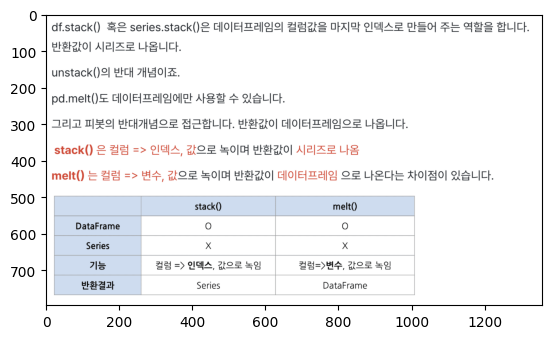

In [54]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

img = imread('stackvsmelt1.png')         # 이미지 읽어오기(적절한 경로를 설정해야 함)

plt.imshow(img)                                                               # 읽어온 이미지 표시
plt.show()

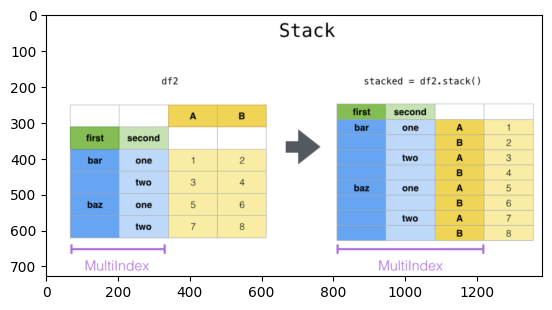

In [55]:
img2 = imread('stackvsmelt2.png')         # 이미지 읽어오기(적절한 경로를 설정해야 함)

plt.imshow(img2)                                                               # 읽어온 이미지 표시
plt.show()

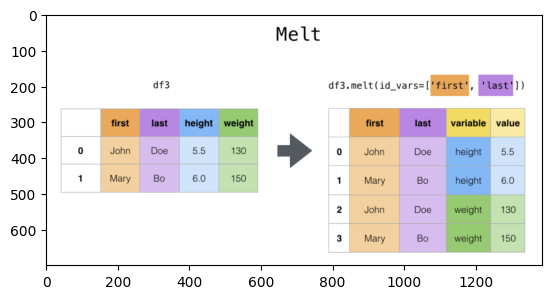

In [56]:
img3 = imread('stackvsmelt3.png')         # 이미지 읽어오기(적절한 경로를 설정해야 함)

plt.imshow(img3)                                                               # 읽어온 이미지 표시
plt.show()

<hr>
<div>
    <a href="./3-cleaning_data.ipynb">
        <button>&#8592; Previous Notebook</button>
    </a>
    <a href="./5-handling_data_issues.ipynb">
        <button style="float: right;">Next Notebook &#8594;</button>
    </a>
</div>
<hr>